In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Setando o estilo padrão para o do Seaborn
sns.set_theme()

In [2]:
def encode_rare_categories(dataset, column, threeshold):
    """Agrupa as categorias de valor raro em uma única

    Args:
        dataset (pd.DataFrame): dataset contendo a coluna a ser alterada
        column (str): nome da coluna
        threeshold (int): número mínimo de vezes que uma categoria deve aparecer no dataset 

    Returns:
        pd.DataFrame: dataset com as alterações aplicadas
    """
    cat_count = dataset[column].value_counts()
    cats_to_encode = cat_count[cat_count <= threeshold].index.to_list()
    encode_function = lambda value: "Other" if value in cats_to_encode else value
    dataset[column] = dataset[column].apply(encode_function)
    
    return dataset

Antes de qualquer coisa, vamos entender nossas variáveis. Inicialmente, vamos 
checar os tipos e verificar se eles exigem alguma mudança, assim, conseguiremos 
analisar os dados da maneira correta.

In [3]:
# Lendos os dados
data_fraud = pd.read_csv("../data/raw/dados - dados.csv")

In [4]:
# Checando os tipos
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   pais                 149806 non-null  object 
 7   score_7              150000 non-null  int64  
 8   produto              150000 non-null  object 
 9   categoria_produto    150000 non-null  object 
 10  score_8              150000 non-null  float64
 11  score_9              149989 non-null  float64
 12  score_10             149635 non-null  float64
 13  entrega_doc_1        150000 non-null  int64  
 14  entrega_doc_2        41143 non-null   object 
 15  entrega_doc_3    

De acordo com os resultados, todas as colunas estão com o formato correto, com 
exceção da coluna ```data_compra```, que deve ser alterada para **datetime**, e
da coluna **entrega_doc_1**, que por padrão deveria ser categórica, mas já está
codificada. 

In [5]:
# Alterando o tipo das variáveis
data_fraud["data_compra"] = pd.to_datetime(data_fraud["data_compra"])

data_fraud["entrega_doc_1"] = data_fraud["entrega_doc_1"].astype("object")
data_fraud["entrega_doc_1"] = data_fraud["entrega_doc_1"].map({0:"N", 
                                                               1:"Y"})

Agora que aplicamos a alteração com sucesso, vamos explorar as variáveis. 

## Análise Univariada 

De inicio, irei verificar os dados fornecidos pela função **describe** do pandas.

In [6]:
data_fraud.describe()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,data_compra,valor_compra,score_fraude_modelo,fraude
count,150000.000000,137016.000000,1.370160e+05,149635.000000,150000.000000,149989.000000,150000.000000,150000.000000,149989.000000,149635.000000,150000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.728115,2.604451e+05,21.677669,0.220641,51.169352,14.193513,0.497532,2305.409403,299.969579,2020-03-30 23:41:40.546252800,43.523134,48.066240,0.050000
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,2020-03-08 00:02:15,0.020000,0.000000,0.000000
25%,4.000000,0.678400,9.679915e+03,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,2020-03-18 12:40:32.249999872,9.380000,23.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,2020-03-31 00:08:33,20.610000,48.000000,0.000000
75%,4.000000,0.806500,1.454436e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3445.000000,459.000000,2020-04-12 12:40:16,40.692500,73.000000,0.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,2020-04-21 23:59:56,3696.350000,100.000000,1.000000
std,0.753206,0.132943,8.464361e+05,20.062146,2.434995,709.472904,14.161216,0.288348,1712.379601,321.075806,NaN,91.557888,28.995122,0.217946


- Os nossos dados compreendem o período entre 18-03-20 e 21-04-20.
- O valor médio das compras é de R$48.06, sendo influenciado por valores
discrepantes, já que sua mediana é de apenas R$20.61.
- O valor do score fornecido pelo modelo é, em média, de 48%, estando bem
próximo do limiar de decisão (50%).

In [7]:
# Verificando a quantidade de nulos
data_fraud.isna().sum()

score_1                     0
score_2                 12984
score_3                 12984
score_4                   365
score_5                     0
score_6                    11
pais                      194
score_7                     0
produto                     0
categoria_produto           0
score_8                     0
score_9                    11
score_10                  365
entrega_doc_1               0
entrega_doc_2          108857
entrega_doc_3               0
data_compra                 0
valor_compra                0
score_fraude_modelo         0
fraude                      0
dtype: int64

Agora, vamos verificar as distribuições das variáveis numéricas.

### Variáveis numéricas

In [8]:
# Selecionando as variáveis numéricas
num_vars = data_fraud.select_dtypes(["int", "float"]).columns

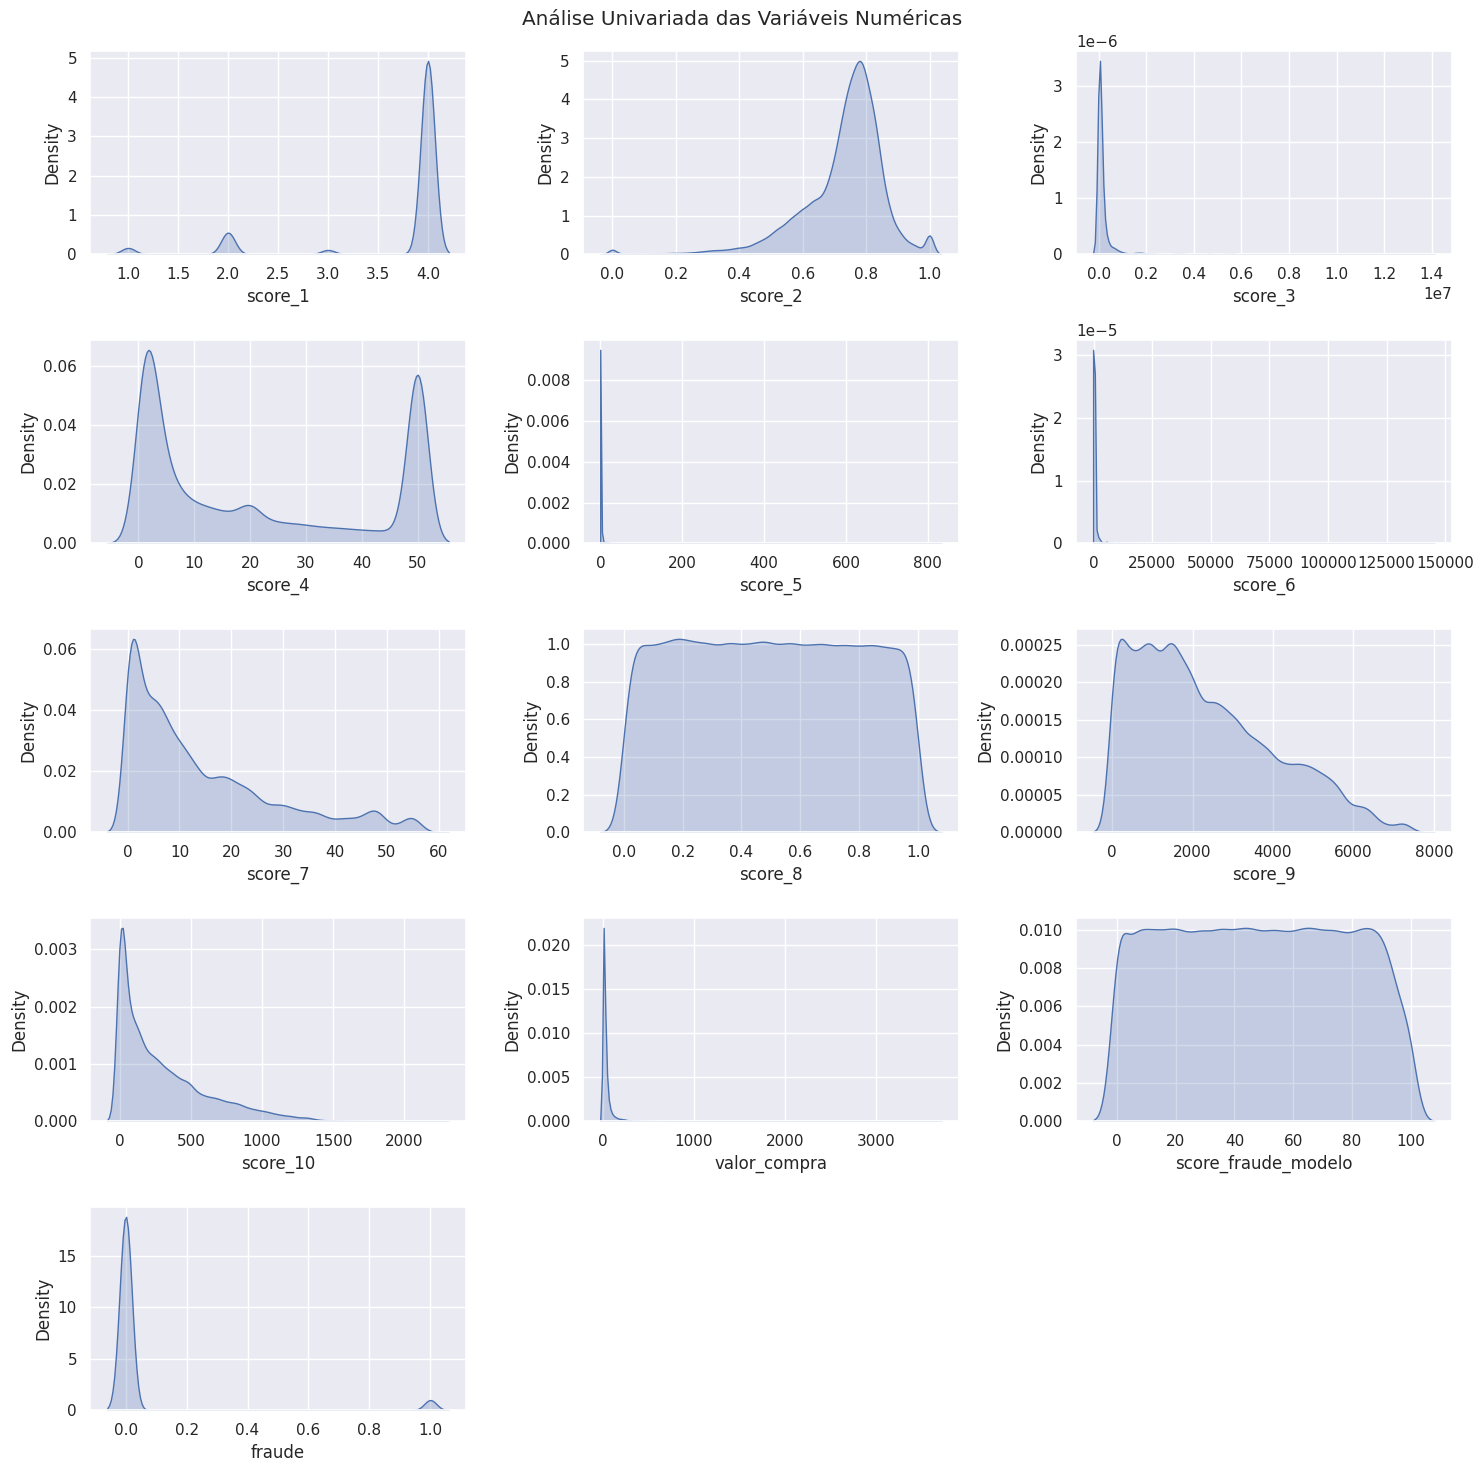

In [9]:
# Criando a figure principal
plt.figure(figsize=(15, 15))

# Setando o título
plt.suptitle("Análise Univariada das Variáveis Numéricas")

# Adicionando os subplots
for index in range(len(num_vars)):
    plt.subplot(5, 3, index+1)
    sns.kdeplot(data_fraud[num_vars[index]], fill=True, color="b")
    plt.xlabel(num_vars[index])
    plt.tight_layout()
    

- As variáveis **score 5** e **score 6** possuem valores que fogem totalmente da 
distribuição comum das outras variáveis de score. Além de isso indicar a presença
de outliers, é possível que esses outliers sejam provenientes de erro.

- Apesar da variável **score 3** possuir uma forma semelhante as variáveis 
citadas acima, a escala não é tão diferente, indicando que seus outliers podem 
ser naturais.

- O nossa variável target, **fraude**, está desbalanceada.

### Variáveis Categóricas

In [10]:
# Obtendo as variáveis categóricas
cat_vars = data_fraud.select_dtypes("object").columns

In [11]:
# Calculando a esparsidade de cada coluna
for col in cat_vars:
    col_sparsity = data_fraud[col].nunique()
    print(f"{col}: {col_sparsity} valores únicos")

pais: 51 valores únicos
produto: 127804 valores únicos
categoria_produto: 8324 valores únicos
entrega_doc_1: 2 valores únicos
entrega_doc_2: 2 valores únicos
entrega_doc_3: 2 valores únicos


As categorias **pais**, e em especial, **produto** e **categoria_produto**,
possuem alta dimensionalidade. Para investigar melhor essas variáveis, irei 
utilizar o método **value_counts** do pandas. Além disso, aplicar o 
OneHotEncoding futuramente pode não ser o ideal para elas.

As variáveis restantes serão plotadas em um gráfico para averiguar a
distribuição de seus valores.

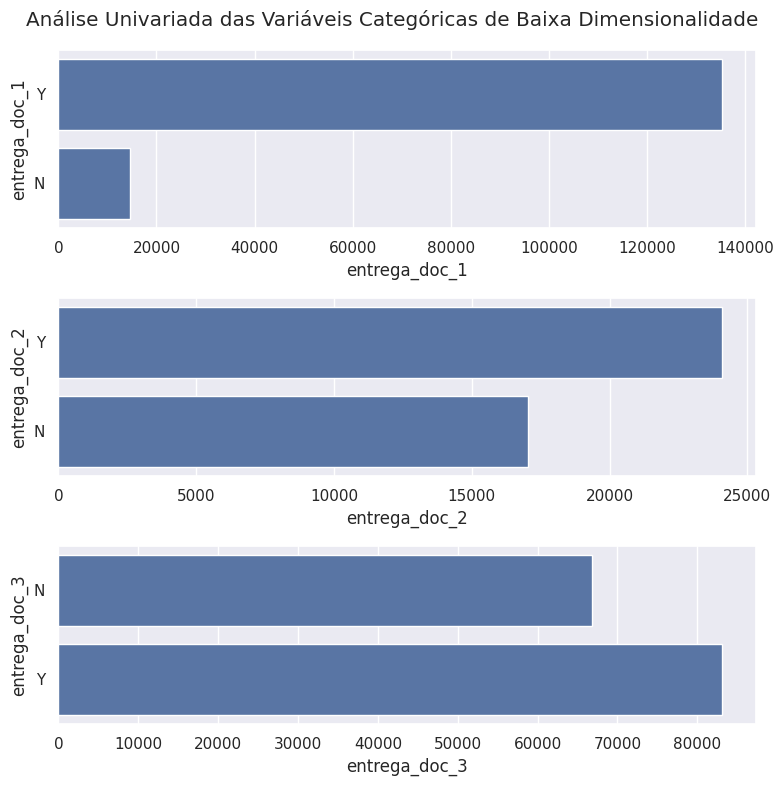

In [12]:
# Selecionando as variáveis para plot
cat_low_sparsity = [col for col in cat_vars if col not in ["pais", "produto", "categoria_produto"]]

# Definindo a figura
plt.figure(figsize=(8, 8))

# Setando o título
plt.suptitle("Análise Univariada das Variáveis Categóricas de Baixa Dimensionalidade")

# Plotando as variáveis
for index in range(len(cat_low_sparsity)):
    plt.subplot(3, 1, index+1)
    sns.countplot(data_fraud[cat_low_sparsity[index]])
    plt.xlabel(cat_low_sparsity[index])
    plt.tight_layout()

As variáveis **entrega_doc_2** e **entrega_doc_3** são bem semelhantes, estando
bem balanceadas. Já a coluna **entrega_doc_1** está desbaçlanceada, mas 
possuindo um bom número de itens da classe com menor presença (pouco mais de 12 
mil).

In [13]:
# Verificando se existem valores raros nas categorias com alta esparsidade
# - pais
data_fraud["pais"].value_counts()

pais
BR    111628
AR     31964
UY      2967
US      2273
SE       358
MX       236
RU        73
ES        69
CO        64
GB        43
FR        18
IT        14
PT        13
CL         9
DE         9
PE         5
PY         4
EC         4
AU         3
UA         3
CN         3
CA         3
BE         3
NZ         3
CH         3
PA         3
BO         2
LB         2
PR         2
NL         2
CR         2
AE         2
AD         1
GE         1
KR         1
IN         1
HN         1
NI         1
GR         1
DO         1
EG         1
TR         1
BS         1
PH         1
GH         1
TW         1
FI         1
NO         1
IL         1
JP         1
ZA         1
Name: count, dtype: int64

In [14]:
# Verificando se existem valores raros nas categorias com alta esparsidade
# - produto
data_fraud["produto"].value_counts()

produto
Fone De Ouvido Sem Fio Xiaomi Airdots Preto                     83
Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno 4 Gb Ram         51
Clean Sept - Álcool Em Gel 70% 500 Ml                           49
Tapete Ilustrativo Pista Carrinho Hot Wheels 0,60x1,20m         47
Máscara Descartável Tripla Com Elástico Proteção Anvisa 50un    47
                                                                ..
Interruptor Lâmpada 3 Vias Canais Controle Wirells 110v/220v     1
Fone De Ouvido Para iPad iPhone 4s 5 5c 5s 6 6s Plus+ Brinde     1
2 Potes Moder Diet 500mg 100caps Total 200caps                   1
Pacote Master Revit Diamante + Extras + Brindes 2017 2020        1
Copita Menstrual Silicona Médica Importada Aneer                 1
Name: count, Length: 127804, dtype: int64

In [15]:
# Verificando se existem valores raros nas categorias com alta esparsidade
# - categoria_produto
data_fraud["categoria_produto"].value_counts()

categoria_produto
cat_43b9c10    2331
cat_d69bed9    1799
cat_604df77    1784
cat_6c4cfdc    1449
cat_4249bd8    1191
               ... 
cat_d6c71e0       1
cat_34ac07c       1
cat_4858280       1
cat_be3757f       1
cat_63704c0       1
Name: count, Length: 8324, dtype: int64

Todas as colunas com alta dimensionalidade possuem valores raros, o que pode 
ocasionar erros na hora de dividir os dados em treino/dev/teste. Para evitar 
isso, todas as categorias com um valor menor que x (valor a ser definido) serão 
combinadas.

Além disso, como 85% dos registros da variável **produto** são únicos, optarei
por remover essa variável.  

## Análise bivariada (variável x variável)

Para essa etapa, vamos visualizar a matriz de correlação.

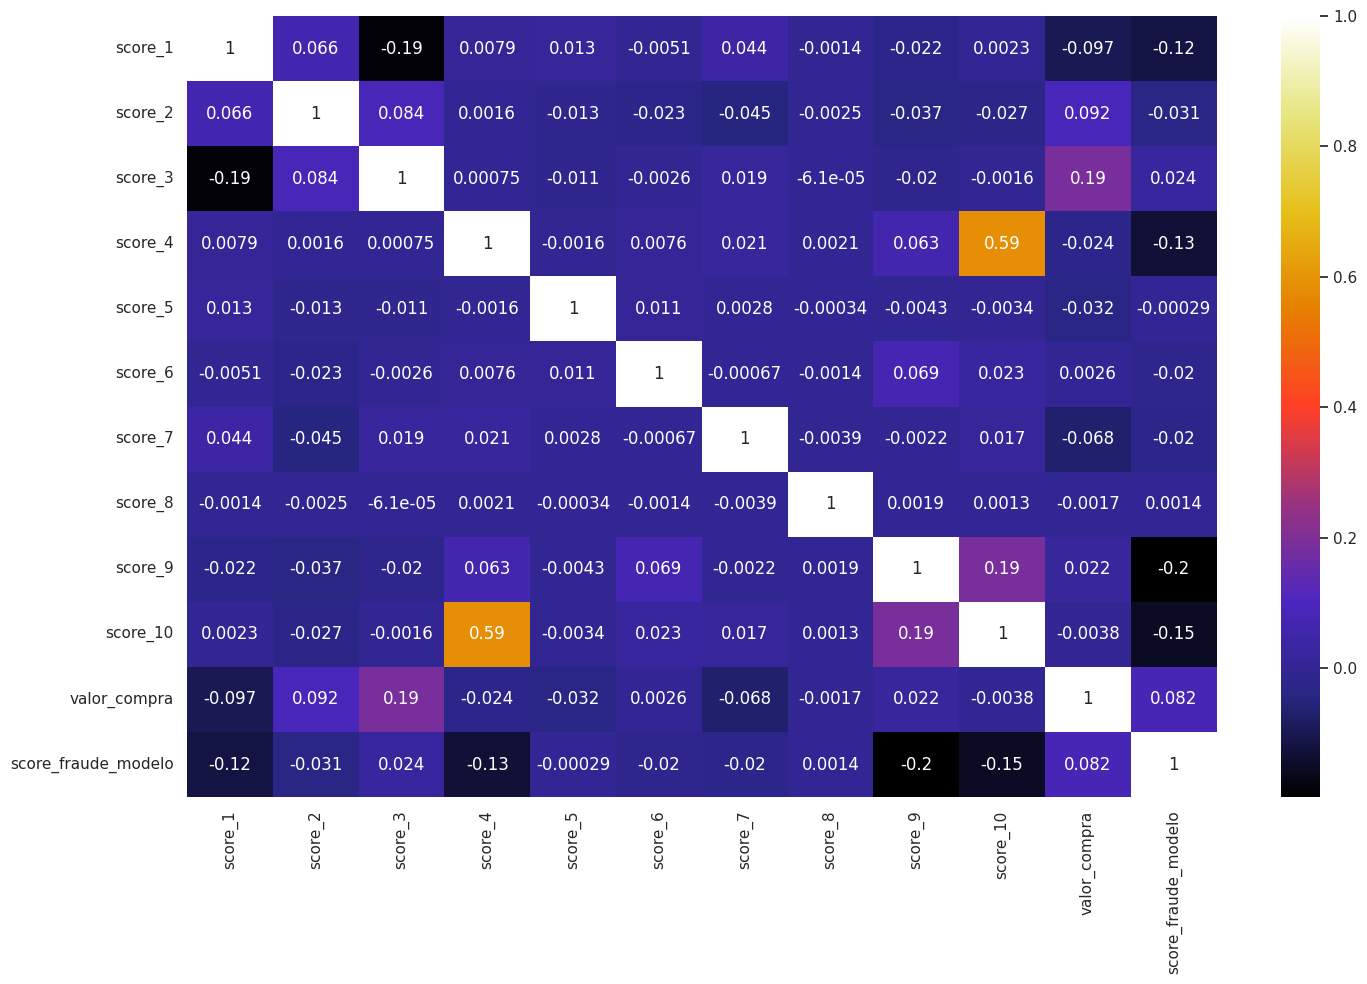

In [16]:
# Definindo as dimensões da figura
plt.figure(figsize=(15, 10))

# Removendo o target das variáveis
vars_to_var = [var for var in num_vars if var != "fraude"]

# Plotando a figura
sns.heatmap(data_fraud[vars_to_var].corr(), annot=True, cmap="CMRmap")
plt.tight_layout()

No geral, as variáveis quase não estão correlacionadas, não exigindo exclusão
por redundância. As variáveis mais correlacionadas são as **score 4** e 
**score 10**, que durante a análise univariada, apresentaram distribuiçoes um
pouco semelhantes.

## Análise bivariada (variável x target)

In [17]:
# Visualizando a correlação das variáveis em relação ao target
data_fraud[num_vars].corr()["fraude"]

score_1               -0.059681
score_2                0.038919
score_3                0.033229
score_4               -0.077807
score_5               -0.002261
score_6               -0.010489
score_7               -0.034864
score_8                0.002395
score_9               -0.117023
score_10              -0.093437
valor_compra           0.073784
score_fraude_modelo    0.172737
fraude                 1.000000
Name: fraude, dtype: float64

No geral, também não há nenhuma variável que está fortemente correlacionada com 
o **target**.

## Tratamendo de Dados / Engenharia de Features

Nesta etapa, irei tratar os problemas identificados durante a análise e criar 
novas features a partir das existentes.

Na fase de ```criação de features```, as seguintes ações serão realizadas:
- Criar nova feature referente ao continente do pais
- Criar features a partir da coluna de data_compra

Já para a fase de ```tratamento```, as seguintes ações serão tomadas:
- Verificar os outliers das colunas score_5 e score_6. Inicialmente, o treinamento 
do algoritmo será feito com eles, e, caso necessário, serão excluídos.
- Combinar as variáveis de presença rara nas colunas pais e categoria_produto
- Preencher os campos ausentes das categorias entrega_doc_1 a entrega_doc_3 como "N"
- Remover a coluna produto e data_compra



### Criação de Features

#### Agrupando por continente

Nesta fase, os paises serão categorizados de acordo com o continente a qual
pertence.

In [18]:
# Agrupando as siglas por continente
america = ['US', 'MX', 'CA', 'PR', 'BR', 'AR', 'UY', 'CO', 'CL', 'PE', 'PY', 'EC', 'BO', 'CR', 'PA', 'HN', 'NI', 'BS', "DO"]
europa = ['SE', 'RU', 'ES', 'GB', 'FR', 'IT', 'PT', 'DE', 'UA', 'BE', 'CH', 'NL', 'AE', 'AD', 'GE', 'GR', 'TR', 'FI', 'NO', 'IL']
asia = ['CN', 'KR', 'IN', 'TW', "JP", "LB", "PH"]
oceania = ['AU', 'NZ']
africa = ['ZA', 'EG', 'GH']

# Definindo uma função para aplicar o agrupamento
continent_encoder = lambda sigla: "Africa" if sigla in africa else("Oceania" if sigla in oceania else ("Asia" if sigla in asia else ("America" if sigla in america else ("Europa" if sigla in europa else np.nan))))

# Aplicando a função
data_fraud["continente"] = data_fraud["pais"].apply(continent_encoder)

#### Novas colunas a partir da data de compra

Como os dadosa foram coletados em um período de pouco mais de 1 mês, variáveis
mais macro, como ano, mês e bimestre podem não ser úteis. O foco será criar 
variáveis micro, voltadas ao dia, hora, etc.

In [19]:
# Dividindo a coluna de data em novos valores
data_fraud["dia_compra"] = data_fraud["data_compra"].dt.day
data_fraud["nome_dia_compra"] = data_fraud["data_compra"].dt.day_name()
data_fraud["hora_compra"] = data_fraud["data_compra"].dt.hour

# Criando novas features a partir das colunas
weekend = ["Saturday", "Sunday"]
data_fraud["dia_compra_classe"] = data_fraud["nome_dia_compra"].apply(lambda dia: "Fim de semana" if dia in weekend else "Dia de semana")

# Dividindo os horários em turnos
madrugada = [0, 1, 2, 3, 4, 5]
manha = [6 ,7 , 8, 9, 10, 11, 12]
tarde = [13, 14, 15, 16, 17]
data_fraud["turno_compra"] = data_fraud["hora_compra"].apply(lambda hora: "madrugada" if hora in madrugada else("manha" if hora in manha else("tarde" if hora in tarde else "noite")))

# Criando variável de hora comercial
data_fraud["horario_comercial_compra"] = data_fraud["hora_compra"].apply(lambda hora: "Comercial" if 8 <= hora >= 18 else "Não Comercial")


### Tratamento

#### Verificando os outliers

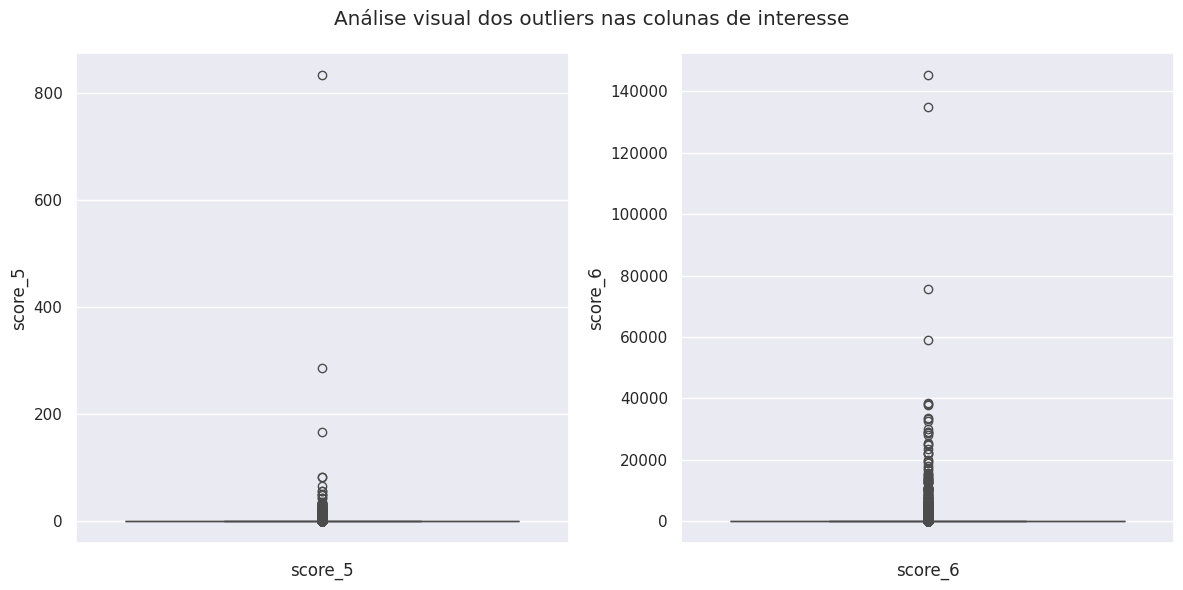

In [20]:
# Verificando os outliers das colunas suspeitas
cols_with_outliers = ["score_5", "score_6"]

# Criando uma figura
plt.figure(figsize=(12, 6))

# Setando o título
plt.suptitle("Análise visual dos outliers nas colunas de interesse")

# Plotando as variáveis
for index in range(len(cols_with_outliers)):
    plt.subplot(1, 2, index+1)
    sns.boxplot(data_fraud[cols_with_outliers[index]])
    plt.xlabel(cols_with_outliers[index])
    plt.tight_layout()


#### Combinando variáveis raras

In [21]:
# Definindo as colunas que passarão pelo processo
cols_with_high_sparsity = {18:"pais", 12:"categoria_produto"}

for threeshold, col_name in cols_with_high_sparsity.items():
    data_fraud = encode_rare_categories(data_fraud, col_name, threeshold)

#### Preencher os campos ausentes com "N"

In [22]:
# Definindo as colunas
cols_to_fill = ["entrega_doc_1", "entrega_doc_2", "entrega_doc_3"]

# Preenchendo o missing
data_fraud[cols_to_fill] = data_fraud[cols_to_fill].fillna("N")

#### Removendo a coluna produto

In [23]:
data_fraud = data_fraud.drop(["produto", "data_compra"], axis=1)

## Conclusão

E aqui se encerra esse processo inicial de análise, correção e criação de novas 
variáveis. Agora, seguiremos para a fase de treinamento do modelo.

Ainda vale citar, que os valores nulos ainda presentes em variáveis de score e 
categóricas, só serão preenchidas durante o treinamento, em uma fase do pipeline 
que será criado. 

In [24]:
# Salvando os dados
data_fraud.to_csv("../data/processed/data_fraud.csv")